In [107]:
import pandas as pd 
df = pd.read_csv('../csv/total/chifoumi-dataset.csv')
df.head(2)

,filename,1x,1y,1z,2x,2y,2z,3x,3y,3z,...,19x,19y,19z,20x,20y,20z,21x,21y,21z,target
0,../raw_data/scissors/dFlxUAypUgfOZqoV.png,0.972548,0.503541,0.000002,0.888238,0.670902,-0.020812,0.766331,0.698617,-0.052920,...,0.682782,0.291712,-0.138871,0.707206,0.337388,-0.104174,0.752084,0.343444,-0.066942,2
1,../raw_data/scissors/b4Qm4ZK5AAUQo1Ax.png,0.883314,0.585556,0.000001,0.758897,0.738274,-0.000408,0.619175,0.731899,-0.014292,...,0.554995,0.351059,-0.067778,0.577250,0.405897,-0.036943,0.619907,0.421913,-0.008412,2


In [108]:
X = df.drop(['filename', 'target'], axis = 1)
y = df['target']

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [130]:
y_train

5715    0
1370    2
7660    0
3311    1
1093    2
       ..
1918    2
7773    0
6927    0
4177    1
6708    0
Name: target, Length: 5745, dtype: int64

In [13]:
# X_train = (X_train - X_train.mean()) / X_train.std()
# X_train
# X_test = (X_test - X_test.mean()) / X_test.std()
# X_test

,1x,1y,1z,2x,2y,2z,3x,3y,3z,4x,...,18z,19x,19y,19z,20x,20y,20z,21x,21y,21z
5804,1.357512,-0.308635,-1.243735,1.295110,0.250679,0.485578,0.941208,0.760783,0.429743,0.417643,...,0.460001,0.245972,-0.782209,0.573339,0.446815,-0.825202,0.627021,0.612134,-0.832672,0.593356
6032,0.774480,0.308768,-0.732764,0.605230,-0.609996,0.686638,0.187166,-1.364279,0.744861,-0.393376,...,0.735378,-0.163951,1.560997,0.797957,0.028351,1.511249,0.729007,0.180339,1.361637,0.614366
8061,-0.342573,0.765572,-0.920501,0.357392,0.371764,0.798045,0.934927,-0.194741,0.826655,1.171859,...,0.524936,-1.146411,0.170295,0.788189,-1.154789,0.335129,0.835488,-1.052446,0.459807,0.769473
1825,0.188576,-1.508819,0.725272,0.874915,-1.562656,2.114927,1.061674,-1.394772,1.507298,0.820639,...,-1.328880,-0.703317,-0.196751,-0.505264,-0.504929,-0.416624,0.202831,-0.360624,-0.616511,0.672348
161,2.137208,0.461552,-0.468450,1.962597,0.835497,-0.422710,1.691108,0.919108,-0.576152,1.650455,...,-0.962961,1.488143,-0.440653,-1.055460,1.719309,-0.250885,-0.904760,1.872242,-0.178698,-0.753311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4850,0.719249,1.359211,0.413713,-0.026902,1.131086,-0.587165,-0.554317,0.805325,-0.718981,-0.783510,...,-0.321839,1.689664,0.463275,-0.400272,1.668845,-0.003523,-0.484036,1.504556,-0.339588,-0.525035
5387,0.540929,1.189209,0.218818,1.452980,0.760866,3.615524,1.834736,0.229608,4.097756,1.866882,...,1.856432,-0.454303,0.060128,1.655242,-0.538350,-0.429804,1.394937,-0.536459,-0.776677,1.240234
4790,-0.171289,-1.238059,0.398628,0.631547,-1.404169,-0.635640,1.035230,-1.191626,-0.634175,1.190166,...,-0.891789,-1.432647,0.330196,-1.052513,-1.494272,0.770092,-1.317625,-1.400678,1.077245,-1.480392
540,1.719275,0.821008,0.661529,1.737371,0.019637,-0.648728,1.468940,-0.354833,-0.702466,1.248695,...,-0.323113,1.095378,1.805681,-0.314592,1.349079,1.624170,-0.204933,1.433728,1.516638,-0.094350


In [104]:
from sklearn.preprocessing import MinMaxScaler,FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector

In [147]:
model = SVC(kernel= 'poly', gamma = 1, coef0 = 0, C = 0.01, probability=True)
# X_train = (X_train - X_train.mean()) / X_train.std()
# rounder = FunctionTransformer(lambda array: np.round(array, decimals=2))
normalizer = FunctionTransformer(lambda x: (x - x.mean()) / x.std())
scaling = make_column_transformer((MinMaxScaler(), make_column_selector(dtype_include=['float64'])))
pipeline = make_pipeline(normalizer, scaling, model)
pipeline

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(func=<function <lambda> at 0x7fb0ab0f9bd0>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb0aa838ee0>)])),
                ('svc',
                 SVC(C=0.01, coef0=0, gamma=1, kernel='poly',
                     probability=True))])

In [148]:
pipe = pipeline.fit(X_train, y_train)

In [118]:
pd.DataFrame(normalizer.fit_transform(X_train)).head()

,1x,1y,1z,2x,2y,2z,3x,3y,3z,4x,...,18z,19x,19y,19z,20x,20y,20z,21x,21y,21z
581,1.720405,-0.643407,0.472827,1.684181,-0.308197,-0.165653,1.455565,-0.329720,-0.190890,1.356174,...,-0.330815,1.573630,-1.406444,-0.375811,1.818265,-1.245588,-0.313101,1.881070,-1.134631,-0.214696
6079,1.254437,-0.430494,-1.264136,1.141742,0.210473,0.317737,0.712385,0.730137,0.281712,0.089770,...,0.424494,0.109552,-1.031360,0.503969,0.309179,-0.978785,0.544257,0.488393,-0.975190,0.509962
1608,0.190924,-1.551315,1.246079,0.950544,-1.600884,-1.010006,1.118930,-1.303723,-1.449031,0.621663,...,-2.146222,-0.869188,-0.522727,-1.668509,-0.584517,-0.758883,-1.173138,-0.454647,-0.977459,-0.764386
5153,0.461520,1.459624,0.446754,-0.316082,1.204642,-0.979316,-0.719110,0.770628,-0.929950,-0.815397,...,-0.758969,1.719339,0.595892,-0.952693,1.748349,0.096784,-1.241767,1.602922,-0.302531,-1.423187
4528,0.634663,-1.256183,0.842978,-0.141545,-1.452954,-1.540881,-0.705250,-1.232229,-1.400209,-1.271302,...,-0.374339,1.661433,0.596412,-0.692721,1.674022,1.013968,-1.026787,1.523163,1.276601,-1.231544


In [149]:
y_pred = pipe.predict(X_test)

In [119]:
pd.DataFrame(normalizer.fit_transform(X_test)).head()

,1x,1y,1z,2x,2y,2z,3x,3y,3z,4x,...,18z,19x,19y,19z,20x,20y,20z,21x,21y,21z
7860,-0.297329,0.923858,-0.635283,0.426214,0.554108,0.998556,0.824804,0.127502,1.038448,0.775011,...,1.207580,-0.949448,0.290754,1.190760,-0.908629,0.479929,1.100392,-0.887116,0.621154,1.003536
1534,-0.312582,-1.565160,0.839403,0.370603,-1.689949,-1.146907,0.579146,-1.467750,-1.439519,0.054327,...,-2.205580,-1.827690,-0.385653,-2.263395,-1.554627,-0.565879,-1.876656,-1.334776,-0.805076,-1.484699
264,1.504047,-0.058659,0.511324,1.389631,0.426038,-0.171855,1.051347,0.553229,-0.237075,0.806814,...,-0.370035,0.435175,-0.951383,-0.460156,0.566587,-0.745243,-0.292085,0.787980,-0.637040,-0.081802
809,-0.869925,-0.176525,0.678323,-0.481758,0.243549,0.449527,0.030589,0.106944,0.790058,0.508662,...,1.799759,0.266941,-1.053525,1.723963,0.109558,-0.840323,1.621904,-0.109256,-0.655255,1.587679
7172,-0.188699,-0.830271,-1.679306,0.709011,-0.962219,-0.703682,1.350303,-0.686302,-0.673259,1.404471,...,0.246703,-0.963617,0.414723,0.054233,-0.895052,0.156297,0.101752,-0.879812,-0.060743,0.168406


In [150]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.998375964271214

In [151]:
pd.DataFrame(y_pred).value_counts()

1    830
2    817
0    816
dtype: int64

In [152]:
results = pd.DataFrame({"actual" : y_test,
                       "predicted" : y_pred})

confusion_matrix = pd.crosstab(index= results['actual'],
                              columns = results['predicted'])
confusion_matrix

predicted,0,1,2
actual,,,
0,813,0,0
1,0,829,0
2,3,1,817


In [156]:
import pickle
import dill

with open("pipe.pkl", "wb") as file:
    dill.dump(pipe, file)

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [35]:
probas = pd.DataFrame(pipe.predict_proba(X_test))
probas = probas[probas <= 0.9].dropna().rename(columns = {0:'pierre', 1:'feuille', 2:'ciseaux'})

probas_filename = list(df.filename.iloc[probas.index])

In [36]:
probas_filename

['../raw_data/scissors/1jKhi65BPTLXnUI6.png',
 '../raw_data/scissors/CTbANISUvZMD2T4L.png',
 '../raw_data/scissors/MfDDFjVkEdWKPi2X.png',
 '../raw_data/scissors/uU7I4uUVN2mDwZpo.png',
 '../raw_data/scissors/MqPYNCxzDBls3LRf.png',
 '../raw_data/scissors/evBSpeXRlbUu82CV.png',
 '../raw_data/scissors/8K3rwVoAAjAqkkqq.png']

In [85]:
y_test.iloc[probas.index]

1522    2
7242    0
7916    0
4450    1
2487    2
8130    0
3654    1
Name: target, dtype: int64

In [89]:
for index, row in probas.iterrows():
    print(row.max())

0.8968186639489658
0.7202425232866688
0.8957774574707663
0.890598118369437
0.41625421090844056
0.865279681849957
0.7723748036614674


In [94]:
pd.DataFrame(y_pred).value_counts(), pd.DataFrame(y_test).value_counts()

(1    838
 2    822
 0    803
 dtype: int64,
 target
 1         838
 2         823
 0         802
 dtype: int64)

In [101]:
probas_filename[i]

'../raw_data/scissors/1jKhi65BPTLXnUI6.png'

KeyError: 0

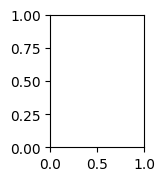

In [98]:
# Let's see some hands.
fig = plt.figure(figsize=(7,10))

for i in range(len(probas_filename)):
    plt.subplot(5, 5, i + 1)
    plt.title(y_test[i], size=11)
    plt.imshow(mpimg.imread(probas_filename[i]))
    plt.xticks(())
    plt.yticks(())

plt.tight_layout()